In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
# load the IMDB dataset
# num_words=10000 keeps the top 10,000 most frequently occurring words in the training data and discards rare words
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
# review train & test datasets containing a list of word indices (encoding a sequence of words)
print(train_data[0])

# labels
# 0 negative 
# 1 positive
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
# check the number of sequences of words
max([max(sequence) for sequence in train_data])
# from index 0 to 9999 (the max sequence of words is 10000)

9999

In [5]:
#word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()

# Reverse it, mapping integer indices Decodes the review. Note that the indices are offset by 3 to words
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

# Decodes the review. Note that the indices are offset by 3 
# because 0, 1, and 2 are reserved indices for “padding,”
# “start of sequence,” and “unknown"
decoded_review = " ".join(
[reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preparing the data through vectorization
* Pad lists so that all reviews have the same length, turn them into an integer tensor of shape (samples, max_length), and start model with a layer capable of handling such integer tensors
* Multi-hot encode lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 8 and 5, which would be 1s. 
* Then  use a Dense layer, capable of handling floating-point vector data, as the
first layer in your model.

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [8]:
# vectorize training & testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
# review vectorized training & testing data
print(x_train[0])
print(x_test[0])
print(y_train[0])
print(y_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
1.0
0.0


In [10]:
# Model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # each Dense performs this operation
    # output = relu(dot(input, W) + b)
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

In [11]:
# complie the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [12]:
## Validating the model
## Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [13]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 75ms/step - loss: 0.4945 - accuracy: 0.7914 - val_loss: 0.3703 - val_accuracy: 0.8718
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2924 - accuracy: 0.9048 - val_loss: 0.3220 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2119 - accuracy: 0.9340 - val_loss: 0.2939 - val_accuracy: 0.8796
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1719 - accuracy: 0.9423 - val_loss: 0.3072 - val_accuracy: 0.8762
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1391 - accuracy: 0.9563 - val_loss: 0.2821 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1165 - accuracy: 0.9641 - val_loss: 0.2938 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0965 - accuracy: 0.9725 - val_loss: 0.3166 - val_accuracy: 0.8837
Epoch 8/20
30

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


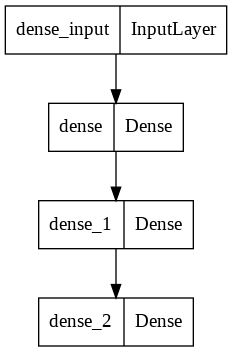

In [15]:
# plot the model
keras.utils.plot_model(model, "imdb_classifier.png")

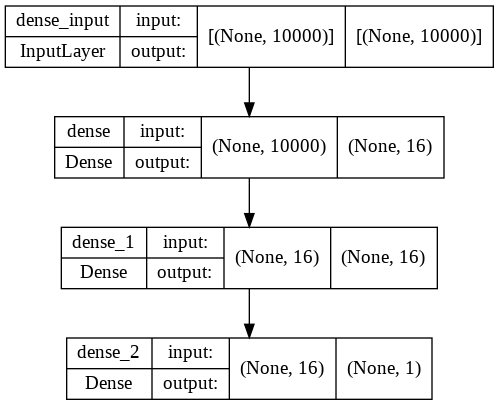

In [16]:
# plot the model with shape
keras.utils.plot_model(model, 
                       "imdb_classifier_with_shape_info.png", 
                       show_shapes=True)

* The call to model.fit() returns a History object.
* The History object has a member history, which is a dictionary containing data about everything
that happened during training.

In [17]:
# review the history object
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

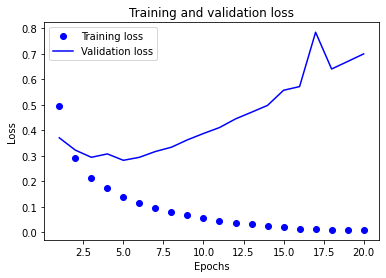

In [18]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

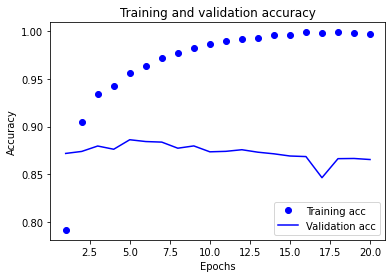

In [19]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
## Make predictions from test dataset and review the prediction results 
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7660 - accuracy: 0.8508


In [21]:
# [test loss, test accuracy]
results

[0.7659609317779541, 0.8508399724960327]

In [22]:
# Check the model layers
model.layers

In [23]:
# Check the specific layer of model, say layer 2 input
model.layers[2].input

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'dense_1')>

In [24]:
# Check the specific layer of model, say layer 2 output
model.layers[2].output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

# Save the model
* Keras uses the HDF5 format to save both the model’s architecture (including every
layer’s hyperparameters) and the values of all the model parameters for every layer
(e.g., connection weights and biases). 
* It also saves the optimizer (including its hyperparameters and any state it may have).
* This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. 
* Use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore
everything else yourself.

In [25]:
# save the model
model.save("imdb_keras_model.h5")

In [26]:
# Load the saved model
model = keras.models.load_model("imdb_keras_model.h5")

## Callbacks
* Training may last for several hours especially when training on large datasets. 
* The model should be saved checkpoints at regular intervals during training, to avoid losing
everything if your computer crashes. 
* Use callbacks during the fit() method to save
checkpoints.
* Also save the model after the training is finished.

In [27]:
# specify the callback as illustrated below
# set save_best_only=True when using a validation set during training
# saves model when its performance on the validation set is the best so far.
# eliminates challenges related to training for too long and overfitting the training set: 
# simply restore the last model saved after training which will be the best model on the validation set.

checkpoint_cb = keras.callbacks.ModelCheckpoint("imdb_keras_model.h5",
                                                save_best_only=True)

In [29]:
# fit the model
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=10, 
                    callbacks=[checkpoint_cb])
# the model automatically gets saved due to callbacks option

model.save("imdb_keras_model.h5")

#model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Epoch 1/10
466/469 [============================>.] - ETA: 0s - loss: 7.1997e-05 - accuracy: 0.9999

469/469 [==============================] - 2s 4ms/step - loss: 7.1581e-05 - accuracy: 0.9999
Epoch 2/10
466/469 [============================>.] - ETA: 0s - loss: 2.4905e-05 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 2.4763e-05 - accuracy: 1.0000
Epoch 3/10
462/469 [============================>.] - ETA: 0s - loss: 8.3667e-06 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 8.2606e-06 - accuracy: 1.0000
Epoch 4/10
462/469 [============================>.] - ETA: 0s - loss: 3.6533e-06 - accuracy: 1.0000

469/469 [==============================] - 2s 3ms/step - loss: 3.6011e-06 - accuracy: 1.0000
Epoch 5/10
459/469 [============================>.] - ETA: 0s - loss: 5.8303e-07 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 5.7108e-07 - accuracy: 1.0000
Epoch 6/10
468/469 [============================>.] - ETA: 0s - loss: 9.9330e-08 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 9.9172e-08 - accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - ETA: 0s - loss: 2.8046e-08 - accuracy: 1.0000

469/469 [==============================] - 3s 6ms/step - loss: 2.8046e-08 - accuracy: 1.0000
Epoch 8/10
466/469 [============================>.] - ETA: 0s - loss: 1.0642e-08 - accuracy: 1.0000

469/469 [==============================] - 3s 6ms/step - loss: 1.0595e-08 - accuracy: 1.0000
Epoch 9/10
459/469 [============================>.] - ETA: 0s - loss: 4.9028e-09 - accuracy: 1.0000

469/469 [==============================] - 2s 5ms/step - loss: 4.8170e-09 - accuracy: 1.0000
Epoch 10/10
457/469 [============================>.] - ETA: 0s - loss: 2.3895e-09 - accuracy: 1.0000

469/469 [==============================] - 2s 3ms/step - loss: 2.3496e-09 - accuracy: 1.0000


OSError: ignored

## Early Stopping
* Another approach to callback is early stopping.
* Use the EarlyStopping callback
  * to automatically interrupt training when it measures no progress on the validation set for a number of epochs 
  * it optionally rolls back to the best model

* Combine both callbacks to save checkpoints of 
model and interrupt training early when there is no more progress

In [31]:
# patience =10 argument defines number of epochs after which progress on validation set is reviewed
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)


history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=10, 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
460/469 [============================>.] - ETA: 0s - loss: 1.5057e-09 - accuracy: 1.0000

469/469 [==============================] - 2s 3ms/step - loss: 1.4973e-09 - accuracy: 1.0000
Epoch 2/10
463/469 [============================>.] - ETA: 0s - loss: 1.0657e-09 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 1.0665e-09 - accuracy: 1.0000
Epoch 3/10
457/469 [============================>.] - ETA: 0s - loss: 8.9045e-10 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 8.8691e-10 - accuracy: 1.0000
Epoch 4/10
467/469 [============================>.] - ETA: 0s - loss: 7.4315e-10 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 7.4158e-10 - accuracy: 1.0000
Epoch 5/10
461/469 [============================>.] - ETA: 0s - loss: 6.5443e-10 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 6.5238e-10 - accuracy: 1.0000
Epoch 6/10
456/469 [============================>.] - ETA: 0s - loss: 6.0882e-10 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 5.9811e-10 - accuracy: 1.0000
Epoch 7/10
458/469 [============================>.] - ETA: 0s - loss: 5.6400e-10 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 5.6341e-10 - accuracy: 1.0000
Epoch 8/10
457/469 [============================>.] - ETA: 0s - loss: 5.2771e-10 - accuracy: 1.0000

469/469 [==============================] - 2s 3ms/step - loss: 5.2535e-10 - accuracy: 1.0000
Epoch 9/10
468/469 [============================>.] - ETA: 0s - loss: 5.0976e-10 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 5.0895e-10 - accuracy: 1.0000
Epoch 10/10
455/469 [============================>.] - ETA: 0s - loss: 4.7745e-10 - accuracy: 1.0000

469/469 [==============================] - 2s 4ms/step - loss: 4.7536e-10 - accuracy: 1.0000


## TensorBoard
* TensorBoard is a great interactive visualization tool
* Use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and
automatically clustered. 
* TensorBoard tool is installed automatically during the installation of TensorFlow.
* The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations
* Empowers visualizing live data (with a short delay), such as the learning curves during training

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime, os

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs

In case you want to review the training using tensorboard when the model is actually training, use the following instructions in the below code blocks:
Note that the training display on tensorboard will lag by a few seconds from the real-time training

In [ ]:
# train the model with higher epochs (say 40)

In [ ]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[tensorboard_callback])

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

In [ ]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000) 